<a href="https://colab.research.google.com/github/Amyturbo/jupyter/blob/main/data_cleaning_cloud_native.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# load data set
import pandas as pd
db_cloud = pd.read_csv('/content/MSFT_CNC_AdSpend_03282022.csv')

In [4]:
db_head = db_cloud.head()
db_head

,domain,Q1score,Q2score,Q3score,Q4score,naicslong,naicsshort,Description,"year_founded = (1.98e+03, Inf]",has_pricing_link = true,...,top_ppc_keywords,ppc_age,num_ppc_kw,ppc_clicks,ppc_budget,top_seo_keywords,seo_age,num_seo_kw,seo_clicks,seo_value
0,gocanvas.com,0.999045,0.999479,0.999779,0.999699,54151.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,mobile app software;mobile apps software;free ...,20101201.0,493.0,4688.391055,22156.521,punch list form;punch list forms;restaurant in...,20070501.0,7267.0,28399.148262,62469.369671
1,koordinates.com,0.997485,0.999365,0.999786,0.999681,54151.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,NaN,20160901.0,0.0,0.000000,0.000,payphone locations;map of new Zealand snares i...,20080501.0,1331.0,12189.392494,7975.646736
2,synduit.com,0.998115,0.998311,0.999048,0.999669,541830.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,outsourced marketing;how to outsource your bus...,20110801.0,0.0,0.000000,0.000,disadvantages of outsourcing;outsourcing advan...,20110901.0,28.0,11.903910,7.687943
3,trainingpeaks.com,0.997401,0.999596,0.999757,0.999663,517311.0,51.0,Information,Y,Y,...,triathlon coach;online coaching software;cycli...,20060601.0,26.0,1257.977431,1169.034,training peak;peak training;running training d...,20060601.0,6438.0,279497.478845,230971.281170
4,bridestory.com,0.998814,0.998424,0.999383,0.999653,54151.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,NaN,20140501.0,0.0,0.000000,0.000,NaN,20140401.0,2427.0,70024.111219,9552.961438


In [5]:
db_info = db_cloud.info()
db_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 72 columns):
 #   Column                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                    --------------  -----  
 0   domain                                                                                                                                                                                                                                                                   

Data Cleaning:
1. handle missing data
2. remove duplicate rolls
3. ensure data consistency

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage_db = (db_cloud.isnull().sum() / len(db_cloud)) * 100

# Filter columns with missing values
missing_percentage_db = missing_percentage_db[missing_percentage_db > 0].sort_values(ascending=False)

missing_percentage_db


top_ppc_keywords                  74.14
estimatedMonthlyBudget Dec '21    60.53
estimatedMonthlyBudget Oct '21    59.75
estimatedMonthlyBudget Feb '22    59.72
estimatedMonthlyBudget Nov '21    59.09
estimatedMonthlyBudget Mar '22    59.03
estimatedMonthlyBudget Jan '22    58.86
top_seo_keywords                  50.22
keywords                          44.44
num_ppc_kw                        14.46
ppc_age                           14.46
seo_value                         14.46
ppc_clicks                        14.46
seo_age                           14.46
num_seo_kw                        14.46
seo_clicks                        14.46
ppc_budget                        14.46
Description                        6.28
naicsshort                         6.28
naicslong                          6.28
organic_domain_ranking             3.98
paid_domain_ranking                3.98
paid_clicks_per_month              3.98
organic_clicks_per_month           3.98
number_of_advertisers              3.98


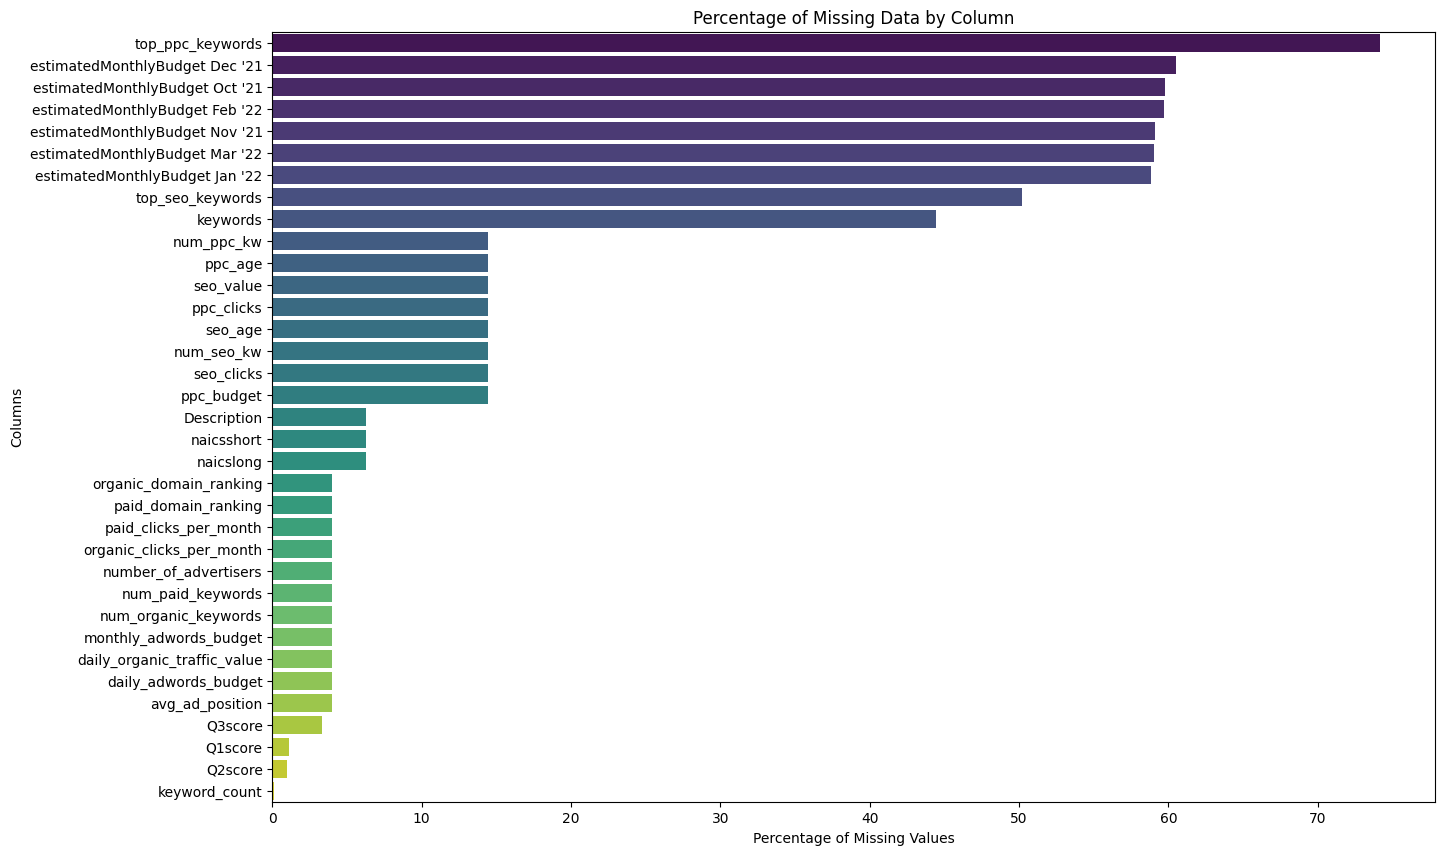

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.barplot(y=missing_percentage_db.index, x=missing_percentage_db.values, palette='viridis')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Data by Column')
plt.show()

summary:
ppc_keyword, seo_keyword and estimated budget columns have over 50% missing values.

Data cleaning plans:
1. For columns with high percentages(over 50%) of missing values, we consider dropping them.
2. For numerical columns with missing values, we'll impute using the median.
3. For categorical columns with missing values, like top_seo_keywords, we'll fill missing values with "Unknown".

In [12]:
# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage_db[missing_percentage_db > 50].index
cleaned_db = db_cloud.drop(columns=columns_to_drop)

# Impute missing values for numerical columns with their medians
numerical_cols_with_na = missing_percentage_db[(missing_percentage_db <= 50) & (missing_percentage_db > 0)].index.intersection(cleaned_db.select_dtypes(['float64', 'int64']).columns)
for col in numerical_cols_with_na:
    cleaned_db[col].fillna(cleaned_db[col].median(), inplace=True)

# Impute missing values for categorical columns like 'top_seo_keywords' with "Unknown"
categorical_cols_with_na = missing_percentage_db[(missing_percentage_db <= 50) & (missing_percentage_db > 0)].index.intersection(cleaned_db.select_dtypes(['object']).columns)
for col in categorical_cols_with_na:
    cleaned_db[col].fillna('Unknown', inplace=True)

cleaned_db


,domain,Q1score,Q2score,Q3score,Q4score,naicslong,naicsshort,Description,"year_founded = (1.98e+03, Inf]",has_pricing_link = true,...,organic_domain_ranking,paid_domain_ranking,ppc_age,num_ppc_kw,ppc_clicks,ppc_budget,seo_age,num_seo_kw,seo_clicks,seo_value
0,gocanvas.com,0.999045,0.999479,0.999779,0.999699,54151.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,78130.0,1.314600e+04,20101201.0,493.0,4688.391055,22156.521,20070501.0,7267.0,28399.148262,62469.369671
1,koordinates.com,0.997485,0.999365,0.999786,0.999681,54151.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,334155.0,2.147484e+09,20160901.0,0.0,0.000000,0.000,20080501.0,1331.0,12189.392494,7975.646736
2,synduit.com,0.998115,0.998311,0.999048,0.999669,541830.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,5533255.0,2.147484e+09,20110801.0,0.0,0.000000,0.000,20110901.0,28.0,11.903910,7.687943
3,trainingpeaks.com,0.997401,0.999596,0.999757,0.999663,517311.0,51.0,Information,Y,Y,...,26903.0,5.057400e+04,20060601.0,26.0,1257.977431,1169.034,20060601.0,6438.0,279497.478845,230971.281170
4,bridestory.com,0.998814,0.998424,0.999383,0.999653,54151.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,297218.0,2.147484e+09,20140501.0,0.0,0.000000,0.000,20140401.0,2427.0,70024.111219,9552.961438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,cleverelements.com,0.986082,0.986882,0.992280,0.992186,541990.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,333725.5,2.147484e+09,0.0,0.0,0.000000,0.000,20110601.0,1.0,0.050773,0.000000
9996,katalon.com,0.990967,0.991640,0.996946,0.992186,541511.0,54.0,"Professional, Scientific, Tech. Services",N,Y,...,45955.0,1.100560e+05,0.0,105.0,665.826690,1314.654,0.0,4826.0,101355.385911,121993.442543
9997,fooda.com,0.984035,0.992716,0.997072,0.992185,7223.0,72.0,Accommodation and Food Services,Y,N,...,94249.0,2.147484e+09,20140601.0,0.0,0.000000,0.000,20110701.0,1016.0,22890.429175,48882.176176
9998,idealspot.com,0.989665,0.987916,0.996593,0.992185,54151.0,54.0,"Professional, Scientific, Tech. Services",Y,Y,...,6624917.0,2.147484e+09,20150201.0,0.0,0.000000,0.000,20150101.0,23.0,135.633063,2.428693


Check if there's duplicates within data set.

In [13]:
# Check for duplicate rows based on the 'domain' column
duplicate_domains_db = cleaned_db[cleaned_db.duplicated(subset='domain', keep='first')]

# Remove these duplicates if they exist
if not duplicate_domains_db.empty:
    cleaned_db = cleaned_db.drop_duplicates(subset='domain', keep='first')

cleaned_db.shape[0]


10000

No duplicates.

In [14]:
# export the data set
cleaned_db.to_csv('cleaned_data.csv', index=False)